<a href="https://colab.research.google.com/github/mlnrengga/ML_Semester5/blob/main/UTS/UTS_2341720160_Maulana_Rengga_Ramadan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identitas
**Nama : Maulana Rengga Ramadan**

**Kelas : TI-3G**

**Absen : 16**

**NIM : 2341720160**



# Library

In [ ]:
!pip install annoy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.metrics import silhouette_score, davies_bouldin_score

from annoy import AnnoyIndex
from google.colab import drive

# Membaca Dataset

In [ ]:
try:
    drive.mount('/content/drive')
    print("Google Drive berhasil di-mount!")
except Exception as e:
    print(f"Gagal mount Google Drive: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive berhasil di-mount!


In [ ]:
# --- SILAKAN GANTI PATH_DATASET INI DENGAN PATH KE FOLDER ANDA ---
# Contoh: Jika file berada di 'My Drive/Kuliah/PembelajaranMesin/data/train.csv'
PATH_DATASET = '/content/drive/MyDrive/JS Machine Learning/UTS'
# ----------------------------------------------------------------

FILE_NAME = 'train.csv'
FULL_PATH = os.path.join(PATH_DATASET, FILE_NAME)

try:
    df = pd.read_csv(FULL_PATH)

    print(f"Data berhasil dimuat dari: {FULL_PATH}")
    print(f"Bentuk dataset: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan. Pastikan path berikut benar: {FULL_PATH}")
except Exception as e:
    print(f"ERROR saat memuat file: {e}")

Data berhasil dimuat dari: /content/drive/MyDrive/JS Machine Learning/UTS/train.csv
Bentuk dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1.	Preprocessing data

## Tangani missing values

In [ ]:
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print("Kolom dengan nilai null:")
print(columns_with_nulls)

Kolom dengan nilai null:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
# Drop kolom yang tidak relevan untuk clustering
df = df.drop(['Id', 'SalePrice'], axis=1)

# Mengisi nilai null untuk fitur kategorikal dengan indikasi "Tidak ada"
categorical_no_presence = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
    "GarageCond", "GarageQual", "GarageYrBlt", "GarageFinish", "GarageType",
    "BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType2", "BsmtFinType1"
]

for col in categorical_no_presence:
    df[col] = df[col].fillna(f"No{col}")

# Mengisi nilai null untuk fitur numerikal dan kategorikal berdasarkan grouping Neighborhood
numerical_and_categorical_by_neighborhood = {
    "LotFrontage": "median",
    "BsmtFinSF1": "median",
    "BsmtFinSF2": "median",
    "BsmtUnfSF": "median",
    "TotalBsmtSF": "median",
    "MasVnrArea": "mean",
}

for col, strategy in numerical_and_categorical_by_neighborhood.items():
    if strategy == "median":
        df[col] = df.groupby("Neighborhood")[col].transform(lambda x: x.fillna(x.median()))
    elif strategy == "mean":
         df[col] = df.groupby("Neighborhood")[col].transform(lambda x: x.fillna(x.mean()))

# Mengisi nilai null untuk fitur kategorikal berdasarkan mode per Neighborhood
categorical_by_neighborhood_mode = ["MSZoning", "Exterior1st", "Exterior2nd", "MasVnrType", "Electrical"]

for col in categorical_by_neighborhood_mode:
     df[col] = df.groupby("Neighborhood")[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df[col].mode()[0]))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPoolQC,NoFence,NoMiscFeature,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,...,0,0,NoPoolQC,NoFence,NoMiscFeature,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,0,0,NoPoolQC,NoFence,NoMiscFeature,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,0,0,NoPoolQC,NoFence,NoMiscFeature,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,...,0,0,NoPoolQC,NoFence,NoMiscFeature,0,12,2008,WD,Normal


In [ ]:
print(df[categorical_no_presence + list(numerical_and_categorical_by_neighborhood.keys()) + categorical_by_neighborhood_mode].isnull().sum())

PoolQC          0
MiscFeature     0
Alley           0
Fence           0
FireplaceQu     0
GarageCond      0
GarageQual      0
GarageYrBlt     0
GarageFinish    0
GarageType      0
BsmtCond        0
BsmtExposure    0
BsmtQual        0
BsmtFinType2    0
BsmtFinType1    0
LotFrontage     0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
MasVnrArea      0
MSZoning        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
Electrical      0
dtype: int64


## Buat minimal satu fitur baru hasil kombinasi fitur lama

In [ ]:
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']
display(df[['GrLivArea', 'TotalBsmtSF', 'TotalArea']].head())

,GrLivArea,TotalBsmtSF,TotalArea
0,1710,856,2566
1,1262,1262,2524
2,1786,920,2706
3,1717,756,2473
4,2198,1145,3343


## Normalisasi atau standarisasi data

In [ ]:
# Pisahkan kolom numerikal dan kategorikal
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Lakukan Label Encoding pada kolom kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Pastikan tipe data adalah string sebelum encoding
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Gabungkan kembali kolom numerikal dan kategorikal yang sudah di-encode
# Pada tahap ini, semua kolom seharusnya sudah numerik
all_features = numerical_cols + categorical_cols

# Standarisasi semua kolom yang sekarang bersifat numerik
scaler = StandardScaler()
df[all_features] = scaler.fit_transform(df[all_features])
display(df.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea
0,0.073375,-0.045532,-0.231877,-0.207142,0.064238,0.024699,0.750731,0.314667,-0.02618,0.604670,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,0.138777,0.313867,0.208502,-0.008372
1,-0.872563,-0.045532,0.437043,-0.091886,0.064238,0.024699,0.750731,0.314667,-0.02618,-0.628316,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.489110,-0.614439,0.313867,0.208502,-0.059386
2,0.073375,-0.045532,-0.098093,0.073480,0.064238,0.024699,-1.378933,0.314667,-0.02618,0.604670,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.990891,0.138777,0.313867,0.208502,0.161672
3,0.309859,-0.045532,-0.454850,-0.096897,0.064238,0.024699,-1.378933,0.314667,-0.02618,-1.861302,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.121330
4,0.073375,-0.045532,0.615421,0.375148,0.064238,0.024699,-1.378933,0.314667,-0.02618,-0.628316,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,2.100892,0.138777,0.313867,0.208502,0.935372


In [ ]:
# Pilih kolom numerikal
numeric_features_only = df.select_dtypes(include=[np.number])

# Simpan data numerikal untuk clustering
data_for_clustering = numeric_features_only

display(data_for_clustering.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea
0,0.073375,-0.045532,-0.231877,-0.207142,0.064238,0.024699,0.750731,0.314667,-0.02618,0.604670,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,0.138777,0.313867,0.208502,-0.008372
1,-0.872563,-0.045532,0.437043,-0.091886,0.064238,0.024699,0.750731,0.314667,-0.02618,-0.628316,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.489110,-0.614439,0.313867,0.208502,-0.059386
2,0.073375,-0.045532,-0.098093,0.073480,0.064238,0.024699,-1.378933,0.314667,-0.02618,0.604670,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.990891,0.138777,0.313867,0.208502,0.161672
3,0.309859,-0.045532,-0.454850,-0.096897,0.064238,0.024699,-1.378933,0.314667,-0.02618,-1.861302,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.121330
4,0.073375,-0.045532,0.615421,0.375148,0.064238,0.024699,-1.378933,0.314667,-0.02618,-0.628316,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,2.100892,0.138777,0.313867,0.208502,0.935372


#K-Means Clustering

In [ ]:
def plot_kmeans_elbow(data, k_range):
    """
    Menghasilkan plot Elbow untuk menentukan jumlah cluster optimal K-Means.

    Args:
        data (pd.DataFrame atau np.ndarray): Data untuk clustering.
        k_range (list): Daftar nilai K yang akan dieksplorasi.
    """
    inertia = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, marker='o')
    plt.title('Plot Elbow untuk K-Means Clustering')
    plt.xlabel('Jumlah Cluster (K)')
    plt.ylabel('Inertia (Within-cluster sum of squares)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

def perform_kmeans(data, n_clusters):
    """
    Melakukan K-Means clustering pada data.

    Args:
        data (pd.DataFrame atau np.ndarray): Data untuk clustering.
        n_clusters (int): Jumlah cluster.

    Returns:
        sklearn.cluster.KMeans: Objek KMeans yang sudah fit.
        np.ndarray: Label cluster untuk setiap data point.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(data)
    return kmeans, kmeans.labels_

print("Fungsi plot_kmeans_elbow dan perform_kmeans berhasil dibuat.")

Fungsi plot_kmeans_elbow dan perform_kmeans berhasil dibuat.


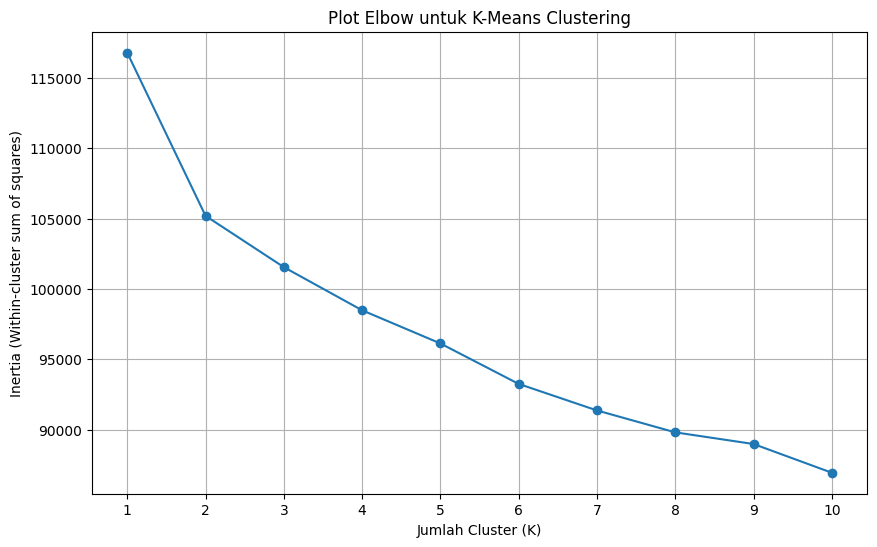

In [ ]:
k_range = range(1, 11)

plot_kmeans_elbow(data_for_clustering, k_range)

In [ ]:
# Lakukan K-Means clustering dengan K=2
n_clusters = 2
kmeans_model, cluster_labels = perform_kmeans(data_for_clustering, n_clusters)

# Tambahkan label cluster ke DataFrame asli
df['Cluster'] = cluster_labels

print(f"K-Means clustering dengan K={n_clusters}:")
display(df.head())

K-Means clustering dengan K=2:


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea,Cluster
0,0.073375,-0.045532,-0.231877,-0.207142,0.064238,0.024699,0.750731,0.314667,-0.02618,0.604670,...,0.063305,0.457447,-0.185975,-0.087688,-1.599111,0.138777,0.313867,0.208502,-0.008372,1
1,-0.872563,-0.045532,0.437043,-0.091886,0.064238,0.024699,0.750731,0.314667,-0.02618,-0.628316,...,0.063305,0.457447,-0.185975,-0.087688,-0.489110,-0.614439,0.313867,0.208502,-0.059386,0
2,0.073375,-0.045532,-0.098093,0.073480,0.064238,0.024699,-1.378933,0.314667,-0.02618,0.604670,...,0.063305,0.457447,-0.185975,-0.087688,0.990891,0.138777,0.313867,0.208502,0.161672,1
3,0.309859,-0.045532,-0.454850,-0.096897,0.064238,0.024699,-1.378933,0.314667,-0.02618,-1.861302,...,0.063305,0.457447,-0.185975,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.121330,0
4,0.073375,-0.045532,0.615421,0.375148,0.064238,0.024699,-1.378933,0.314667,-0.02618,-0.628316,...,0.063305,0.457447,-0.185975,-0.087688,2.100892,0.138777,0.313867,0.208502,0.935372,1


# DBSCAN

In [ ]:
def find_best_dbscan_params(data, eps_range, min_samples_range):
    """
    Mencari parameter eps dan min_samples terbaik untuk DBSCAN berdasarkan Silhouette Score.

    Args:
        data (pd.DataFrame or np.ndarray): Data yang akan di-cluster.
        eps_range (list or np.ndarray): Range nilai eps yang akan dicoba.
        min_samples_range (list or range): Range nilai min_samples yang akan dicoba.

    Returns:
        tuple: (best_eps, best_min_samples, best_score, results_df)
            - best_eps: Nilai eps terbaik
            - best_min_samples: Nilai min_samples terbaik
            - best_score: Silhouette score terbaik
            - results_df: DataFrame berisi semua hasil percobaan
    """
    results = []
    best_silhouette_score = -1
    best_eps = None
    best_min_samples = None

    print("Mulai mencari parameter terbaik untuk DBSCAN...")
    print(f"Mengeksplorasi {len(eps_range) * len(min_samples_range)} kombinasi (eps: {eps_range[0]:.1f}-{eps_range[-1]:.1f}, min_samples: {min(min_samples_range)}-{max(min_samples_range)})\n")

    # Pastikan data berupa numpy array untuk masking yang konsisten
    data_arr = data.values if isinstance(data, pd.DataFrame) else np.asarray(data)

    for eps in eps_range:
        for min_samples in min_samples_range:
            # Perform DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data_arr)

            # Hitung jumlah cluster (tidak termasuk noise)
            unique_labels = np.unique(labels)
            n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
            n_noise = int(np.sum(labels == -1))

            # Siapkan masking untuk mengabaikan noise
            mask = labels != -1
            n_mask = int(np.sum(mask))

            # Hitung silhouette score hanya jika kondisi valid:
            # 1) minimal 2 cluster berbeda pada data non-noise
            # 2) jumlah cluster < jumlah sampel non-noise (syarat silhouette)
            score = -1 # Default score for invalid cases
            if n_clusters > 1 and n_mask > 1:
                masked_labels = labels[mask]
                n_unique_masked = len(np.unique(masked_labels))
                # Ensure more than one unique label after removing noise
                if n_unique_masked > 1 and n_unique_masked < n_mask:
                     try:
                        score = silhouette_score(data_arr[mask], masked_labels)
                     except Exception as e:
                        # Handle potential errors during silhouette_score calculation
                        score = -1 # Keep score as -1 if calculation fails


            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'noise_ratio': n_noise / len(labels),
                'silhouette_score': score
            })

            # Update best parameters and print progress
            if score > best_silhouette_score:
                best_silhouette_score = score
                best_eps = eps
                best_min_samples = min_samples


    results_df = pd.DataFrame(results)

    print(f"\n{'='*60}")
    print(f"HASIL PENCARIAN PARAMETER DBSCAN TERBAIK:")
    print(f"  Best eps: {best_eps:.2f}")
    print(f"  Best min_samples: {best_min_samples}")
    print(f"  Best Silhouette Score (non-noise): {best_silhouette_score:.4f}")
    print(f"{'='*60}\n")

    return best_eps, best_min_samples, best_silhouette_score, results_df

In [ ]:
def perform_dbscan(data, eps, min_samples):
    """
    Performs DBSCAN clustering on the input data.

    Args:
        data (pd.DataFrame or np.ndarray): The data to cluster.
        eps (float): The maximum distance between two samples for one to be considered as in the neighborhood of the other.
        min_samples (int): The number of samples in a neighborhood for a point to be considered as a core point.

    Returns:
        np.ndarray: The cluster labels assigned by DBSCAN, with -1 indicating noise.
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    return labels

Menghitung jarak ke tetangga ke-10 terdekat...


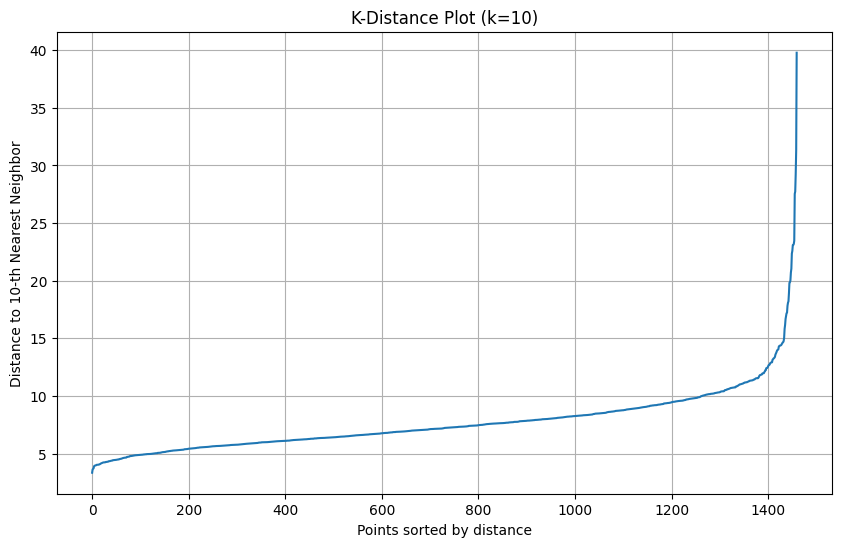

Plot k-distance (dengan k=10) telah dibuat. Cari 'siku' pada plot untuk estimasi rentang awal nilai eps.
Mulai mencari parameter terbaik untuk DBSCAN...
Mengeksplorasi 150 kombinasi (eps: 1.0-5.8, min_samples: 5-30)


HASIL PENCARIAN PARAMETER DBSCAN TERBAIK:
  Best eps: 3.00
  Best min_samples: 5
  Best Silhouette Score (non-noise): 0.6621



In [ ]:
# Cari parameter terbaik untuk DBSCAN
# Memperluas rentang eps untuk mencari cluster yang lebih besar
# eps_range = np.arange(1.0, 6.0, 0.2) # Rentang eps yang lebih luas
# min_samples_range = range(5, 31, 5) # Rentang min_samples yang disesuaikan

# Gunakan plot k-distance untuk membantu menentukan rentang eps yang ideal
# Anda perlu menjalankan sel ini, melihat plot yang dihasilkan, dan menyesuaikan eps_range di bawah
plot_k_distance(data_for_clustering, k=10) # k bisa disesuaikan, misalnya sama dengan min_samples yang ingin dicoba

# Setelah melihat plot k-distance, sesuaikan rentang eps dan min_samples di sini
# Contoh penyesuaian berdasarkan plot:
eps_range = np.arange(1.0, 6.0, 0.2) # Ganti dengan rentang yang Anda anggap ideal berdasarkan plot
min_samples_range = range(5, 31, 5) # Sesuaikan min_samples range jika perlu


best_eps, best_min_samples, best_score, results_df = find_best_dbscan_params(
    data_for_clustering,
    eps_range,
    min_samples_range
)

# Hapus bagian ini sesuai permintaan
# print("\nTop 10 kombinasi parameter terbaik:")
# top_results = results_df.nlargest(10, 'silhouette_score')
# display(top_results)

# Visualisasi Clustering (2D)

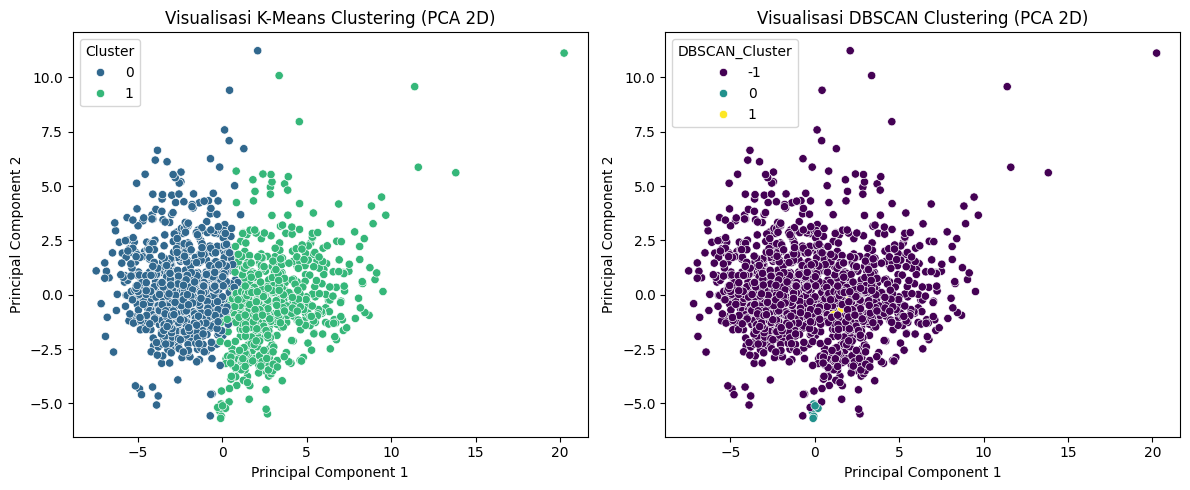

In [ ]:
# Lakukan PCA untuk mereduksi dimensi data ke 2 komponen
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_clustering)

# Tambahkan hasil PCA ke DataFrame untuk memudahkan plotting
df_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])

# Visualisasi K-Means Clustering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], data=df_pca, palette='viridis', legend='full')
plt.title('Visualisasi K-Means Clustering (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Visualisasi DBSCAN Clustering
# Pastikan DBSCAN sudah dijalankan dan label cluster tersimpan di df['DBSCAN_Cluster']
# Jika belum, jalankan DBSCAN dengan parameter terbaik terlebih dahulu
# Misalnya:
# dbscan_labels = perform_dbscan(data_for_clustering, best_eps, best_min_samples)
# df['DBSCAN_Cluster'] = dbscan_labels

# Untuk saat ini, gunakan label DBSCAN dari hasil pencarian parameter terakhir
# Jika Anda sudah menjalankan perform_dbscan secara terpisah, gunakan nama kolom yang sesuai
# Asumsikan label DBSCAN sudah ada di kolom 'DBSCAN_Cluster' atau sejenisnya setelah menjalankan perform_dbscan
# Jika belum ada, kita bisa jalankan perform_dbscan di sini dengan parameter terbaik yang ditemukan sebelumnya
try:
    # Coba ambil label DBSCAN dari kolom yang mungkin sudah dibuat sebelumnya
    dbscan_labels = df['DBSCAN_Cluster']
except KeyError:
    # Jika kolom belum ada, jalankan DBSCAN dengan parameter terbaik yang ditemukan
    print("Menjalankan DBSCAN dengan parameter terbaik untuk visualisasi...")
    # Ambil best_eps dan best_min_samples dari hasil pencarian terakhir
    # Asumsi best_eps dan best_min_samples tersedia dari eksekusi sel sebelumnya
    if 'best_eps' in globals() and 'best_min_samples' in globals():
         dbscan_labels = perform_dbscan(data_for_clustering, best_eps, best_min_samples)
         df['DBSCAN_Cluster'] = dbscan_labels # Simpan label ke DataFrame
    else:
         print("Parameter terbaik DBSCAN (best_eps, best_min_samples) tidak ditemukan. Harap jalankan pencarian parameter terlebih dahulu.")
         dbscan_labels = None # Set labels to None if params are missing


if dbscan_labels is not None:
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='PCA1', y='PCA2', hue=df['DBSCAN_Cluster'], data=df_pca, palette='viridis', legend='full')
    plt.title('Visualisasi DBSCAN Clustering (PCA 2D)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Bandingkan hasil clustering menggunakan:

In [ ]:
# Bandingkan hasil clustering menggunakan Silhouette Score dan Davies-Bouldin Index

print("--- Evaluasi K-Means Clustering ---")
try:
    # Silhouette Score
    # Pastikan ada lebih dari satu cluster dan lebih dari satu sampel
    if len(np.unique(df['Cluster'])) > 1 and len(df['Cluster']) > 1:
        silhouette_avg_kmeans = silhouette_score(data_for_clustering, df['Cluster'])
        print(f"Silhouette Score (K-Means): {silhouette_avg_kmeans:.4f}")
    else:
        print("Silhouette Score (K-Means): Tidak dapat dihitung (kurang dari 2 cluster atau 1 sampel)")

    # Davies-Bouldin Index
    # Pastikan ada lebih dari satu cluster dan tidak ada noise (untuk DBI)
    # DBI juga memerlukan setidaknya 2 cluster
    if len(np.unique(df['Cluster'])) > 1:
        davies_bouldin_kmeans = davies_bouldin_score(data_for_clustering, df['Cluster'])
        print(f"Davies-Bouldin Index (K-Means): {davies_bouldin_kmeans:.4f}")
    else:
         print("Davies-Bouldin Index (K-Means): Tidak dapat dihitung (kurang dari 2 cluster)")

except Exception as e:
    print(f"Error saat menghitung metrik K-Means: {e}")


print("\n--- Evaluasi DBSCAN Clustering ---")
try:
    # Untuk DBSCAN, kita perlu menangani noise (-1 label)
    # Hitung metrik hanya pada titik-titik yang diberi label cluster (bukan noise)
    dbscan_labels = df['DBSCAN_Cluster']
    # Buat mask untuk mengecualikan noise (-1)
    core_samples_mask = dbscan_labels != -1
    n_clusters_dbscan = len(np.unique(dbscan_labels[core_samples_mask])) # Hitung cluster non-noise
    n_samples_clustered = np.sum(core_samples_mask) # Hitung sampel non-noise

    # Silhouette Score untuk DBSCAN (hanya pada data yang diberi label)
    if n_clusters_dbscan > 1 and n_samples_clustered > 1:
        silhouette_avg_dbscan = silhouette_score(data_for_clustering[core_samples_mask], dbscan_labels[core_samples_mask])
        print(f"Silhouette Score (DBSCAN - non-noise): {silhouette_avg_dbscan:.4f}")
    else:
        print("Silhouette Score (DBSCAN): Tidak dapat dihitung (kurang dari 2 cluster non-noise atau 1 sampel non-noise)")

    # Davies-Bouldin Index untuk DBSCAN (hanya pada data yang diberi label)
    if n_clusters_dbscan > 1:
         davies_bouldin_dbscan = davies_bouldin_score(data_for_clustering[core_samples_mask], dbscan_labels[core_samples_mask])
         print(f"Davies-Bouldin Index (DBSCAN - non-noise): {davies_bouldin_dbscan:.4f}")
    else:
         print("Davies-Bouldin Index (DBSCAN): Tidak dapat dihitung (kurang dari 2 cluster non-noise)")

except Exception as e:
    print(f"Error saat menghitung metrik DBSCAN: {e}")

--- Evaluasi K-Means Clustering ---
Silhouette Score (K-Means): 0.1021
Davies-Bouldin Index (K-Means): 2.7766

--- Evaluasi DBSCAN Clustering ---
Silhouette Score (DBSCAN - non-noise): 0.6621
Davies-Bouldin Index (DBSCAN - non-noise): 0.4658


# Approximate Nearest Neighbor (ANN)

In [ ]:
# Gunakan Annoy untuk mencari tetangga terdekat

# 1. Pilih beberapa query points
# Kita bisa memilih beberapa titik secara acak dari setiap cluster (kecuali noise pada DBSCAN)
# Atau memilih beberapa titik secara acak dari seluruh dataset
# Untuk contoh ini, kita ambil beberapa titik secara acak dari seluruh dataset
num_query_points = 5
query_indices = np.random.choice(data_for_clustering.index, num_query_points, replace=False)
query_points = data_for_clustering.loc[query_indices]


# 2. Bangun Annoy Index
# Dimensi data
f = data_for_clustering.shape[1]
# Tipe metrik jarak (misalnya, 'euclidean')
metric = 'euclidean'
# Jumlah pohon dalam index (semakin banyak, semakin akurat tapi lambat)
num_trees = 10

annoy_index = AnnoyIndex(f, metric)

# Tambahkan data ke index
for i in range(data_for_clustering.shape[0]):
    annoy_index.add_item(i, data_for_clustering.iloc[i].values)

# Bangun index
annoy_index.build(num_trees)

print(f"Annoy index dibangun dengan {data_for_clustering.shape[0]} item dan {num_trees} pohon.")

# 3. Cari tetangga terdekat untuk setiap query point
num_neighbors = 10 # Jumlah tetangga terdekat yang dicari (termasuk titik query itu sendiri jika ada)

print("\nMencari tetangga terdekat untuk titik query:")
for i, query_index in enumerate(query_indices):
    query_vector = data_for_clustering.loc[query_index].values

    # Annoy find_nearest returns indices and distances
    neighbor_indices, distances = annoy_index.get_nns_by_item(query_index, num_neighbors, include_distances=True)

    print(f"\nQuery Point Index (Original): {query_index}")
    print("Tetangga Terdekat (Index Original Dataset) dan Jarak:")
    for j in range(len(neighbor_indices)):
        neighbor_original_index = data_for_clustering.index[neighbor_indices[j]]
        distance = distances[j]
        print(f"- Index: {neighbor_original_index}, Jarak: {distance:.4f}")

Annoy index dibangun dengan 1460 item dan 10 pohon.

Mencari tetangga terdekat untuk titik query:

Query Point Index (Original): 964
Tetangga Terdekat (Index Original Dataset) dan Jarak:
- Index: 964, Jarak: 0.0000
- Index: 787, Jarak: 4.2346
- Index: 670, Jarak: 4.7112
- Index: 244, Jarak: 4.9900
- Index: 272, Jarak: 5.1492
- Index: 1057, Jarak: 5.2264
- Index: 0, Jarak: 5.2611
- Index: 131, Jarak: 5.3108
- Index: 315, Jarak: 5.3249
- Index: 1410, Jarak: 5.3501

Query Point Index (Original): 817
Tetangga Terdekat (Index Original Dataset) dan Jarak:
- Index: 817, Jarak: 0.0000
- Index: 667, Jarak: 5.4612
- Index: 1256, Jarak: 5.4704
- Index: 604, Jarak: 6.1117
- Index: 478, Jarak: 6.1785
- Index: 162, Jarak: 6.4177
- Index: 1106, Jarak: 6.4512
- Index: 683, Jarak: 6.4665
- Index: 143, Jarak: 6.4732
- Index: 305, Jarak: 6.4777

Query Point Index (Original): 195
Tetangga Terdekat (Index Original Dataset) dan Jarak:
- Index: 195, Jarak: 0.0000
- Index: 675, Jarak: 2.4680
- Index: 1160, Ja